In [88]:
import pandas as pd
%pip install pm4py
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Note: you may need to restart the kernel to use updated packages.


In [89]:
# Carica il log dei prepaid travel costs
log_prepaid = xes_importer.apply("C:/Users/chiar/OneDrive/Desktop/BIS EXAM 2/PrepaidTravelCost.xes/PrepaidTravelCost.xes")


# Convertilo in DataFrame
df_prepaid = log_converter.apply(log_prepaid, variant=log_converter.Variants.TO_DATA_FRAME)


df_prepaid['time:timestamp'] = pd.to_datetime(df_prepaid['time:timestamp'])
#df_prepaid['case:concept:name'] = df_prepaid['case:concept:name'].astype(str)

# Verifica numero casi ed eventi
print(f"Numero casi prepaid: {len(log_prepaid)}")
print(f"Numero eventi totali prepaid: {sum(len(trace) for trace in log_prepaid)}")

df_prepaid 

parsing log, completed traces :: 100%|██████████| 2099/2099 [00:00<00:00, 2608.07it/s]


Numero casi prepaid: 2099
Numero eventi totali prepaid: 18246


,id,org:resource,concept:name,time:timestamp,org:role,case:Rfp_id,case:Permit travel permit number,case:Task,case:OrganizationalEntity,case:RequestedAmount,...,case:Permit BudgetNumber,case:Permit ProjectNumber,case:Project,case:concept:name,case:Permit OrganizationalEntity,case:Permit RequestedBudget,case:Cost Type,case:Permit id,case:Permit ActivityNumber,case:RfpNumber
0,st_step 73555_0,STAFF MEMBER,Permit SUBMITTED by EMPLOYEE,2017-01-09 14:48:43+00:00,EMPLOYEE,request for payment 73550,UNKNOWN,task 71977,organizational unit 65463,854.579838,...,budget 6198,UNKNOWN,project 503,request for payment 73550,organizational unit 65455,1979.272104,0,travel permit 73549,UNKNOWN,request for payment number 73551
1,st_step 73554_0,STAFF MEMBER,Permit FINAL_APPROVED by SUPERVISOR,2017-01-09 14:48:55+00:00,SUPERVISOR,request for payment 73550,UNKNOWN,task 71977,organizational unit 65463,854.579838,...,budget 6198,UNKNOWN,project 503,request for payment 73550,organizational unit 65455,1979.272104,0,travel permit 73549,UNKNOWN,request for payment number 73551
2,st_step 73558_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-12 11:40:27+00:00,EMPLOYEE,request for payment 73550,UNKNOWN,task 71977,organizational unit 65463,854.579838,...,budget 6198,UNKNOWN,project 503,request for payment 73550,organizational unit 65455,1979.272104,0,travel permit 73549,UNKNOWN,request for payment number 73551
3,st_step 73559_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2017-01-12 11:41:59+00:00,SUPERVISOR,request for payment 73550,UNKNOWN,task 71977,organizational unit 65463,854.579838,...,budget 6198,UNKNOWN,project 503,request for payment 73550,organizational unit 65455,1979.272104,0,travel permit 73549,UNKNOWN,request for payment number 73551
4,st_step 73557_0,STAFF MEMBER,Request For Payment REJECTED by MISSING,2017-01-12 11:53:07+00:00,MISSING,request for payment 73550,UNKNOWN,task 71977,organizational unit 65463,854.579838,...,budget 6198,UNKNOWN,project 503,request for payment 73550,organizational unit 65455,1979.272104,0,travel permit 73549,UNKNOWN,request for payment number 73551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18241,st_step 186614_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2018-12-30 20:16:15+00:00,EMPLOYEE,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613
18242,st_step 186616_0,STAFF MEMBER,Request For Payment APPROVED by ADMINISTRATION,2018-12-30 20:16:25+00:00,ADMINISTRATION,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613
18243,st_step 186615_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2019-01-14 15:09:11+00:00,SUPERVISOR,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613
18244,rp_request for payment 186612_15,SYSTEM,Request Payment,2019-01-15 07:02:45+00:00,UNDEFINED,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613


In [90]:
#convert to integer
df_prepaid['case:RequestedAmount'] = pd.to_numeric(df_prepaid['case:RequestedAmount'], errors='coerce')

In [91]:
df_prepaid = df_prepaid.sort_values(by=['case:concept:name', 'time:timestamp'])

# Get start and end activities for each case
start_activities = pm4py.get_start_activities(df_prepaid)
end_activities = pm4py.get_end_activities(df_prepaid)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))


Start activities: {'Permit SUBMITTED by EMPLOYEE': 1859, 'Request For Payment SUBMITTED by EMPLOYEE': 233, 'Request For Payment SAVED by EMPLOYEE': 7}
End activities: {'Payment Handled': 1970, 'Request For Payment SAVED by EMPLOYEE': 20, 'Request For Payment REJECTED by EMPLOYEE': 72, 'Permit FINAL_APPROVED by SUPERVISOR': 12, 'Request For Payment REJECTED by MISSING': 7, 'Request For Payment REJECTED by ADMINISTRATION': 1, 'Request Payment': 1, 'Permit FINAL_APPROVED by DIRECTOR': 6, 'Permit REJECTED by MISSING': 10}


In [92]:
#FILTER PREPAID BY START AND END ACTIVITIES
prepaid_filtered_log= pm4py.filter_start_activities(log_prepaid, 
                                                      ['Permit SUBMITTED by EMPLOYEE', 'Request For Payment SUBMITTED by EMPLOYEE' ])
prepaid_filtered_log = pm4py.filter_end_activities(prepaid_filtered_log,
                                                    ['Payment Handled', 'Request For Payment REJECTED by EMPLOYEE', 
                                                       'Request For Payment REJECTED by ADMINISTRATION'] )

print(f"Numero casi: {len(prepaid_filtered_log)}")

prepaid_filtered_df = log_converter.apply(prepaid_filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
prepaid_filtered_df

Numero casi: 2043


,id,org:resource,concept:name,time:timestamp,org:role,case:Rfp_id,case:Permit travel permit number,case:Task,case:OrganizationalEntity,case:RequestedAmount,...,case:Permit BudgetNumber,case:Permit ProjectNumber,case:Project,case:concept:name,case:Permit OrganizationalEntity,case:Permit RequestedBudget,case:Cost Type,case:Permit id,case:Permit ActivityNumber,case:RfpNumber
0,st_step 76320_0,STAFF MEMBER,Permit SUBMITTED by EMPLOYEE,2017-01-10 11:19:16+00:00,EMPLOYEE,request for payment 76316,travel permit number 76315,UNKNOWN,organizational unit 65463,1173.957795,...,budget 2233,UNKNOWN,project 503,request for payment 76316,organizational unit 65455,3553.601973,0,travel permit 76314,UNKNOWN,request for payment number 76317
1,st_step 76322_0,STAFF MEMBER,Permit APPROVED by SUPERVISOR,2017-01-10 11:19:23+00:00,SUPERVISOR,request for payment 76316,travel permit number 76315,UNKNOWN,organizational unit 65463,1173.957795,...,budget 2233,UNKNOWN,project 503,request for payment 76316,organizational unit 65455,3553.601973,0,travel permit 76314,UNKNOWN,request for payment number 76317
2,st_step 76321_0,STAFF MEMBER,Permit FINAL_APPROVED by DIRECTOR,2017-01-10 14:56:18+00:00,DIRECTOR,request for payment 76316,travel permit number 76315,UNKNOWN,organizational unit 65463,1173.957795,...,budget 2233,UNKNOWN,project 503,request for payment 76316,organizational unit 65455,3553.601973,0,travel permit 76314,UNKNOWN,request for payment number 76317
3,st_step 76323_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-30 12:37:40+00:00,EMPLOYEE,request for payment 76316,travel permit number 76315,UNKNOWN,organizational unit 65463,1173.957795,...,budget 2233,UNKNOWN,project 503,request for payment 76316,organizational unit 65455,3553.601973,0,travel permit 76314,UNKNOWN,request for payment number 76317
4,st_step 76324_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2017-01-30 12:40:57+00:00,SUPERVISOR,request for payment 76316,travel permit number 76315,UNKNOWN,organizational unit 65463,1173.957795,...,budget 2233,UNKNOWN,project 503,request for payment 76316,organizational unit 65455,3553.601973,0,travel permit 76314,UNKNOWN,request for payment number 76317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17869,st_step 186614_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2018-12-30 20:16:15+00:00,EMPLOYEE,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613
17870,st_step 186616_0,STAFF MEMBER,Request For Payment APPROVED by ADMINISTRATION,2018-12-30 20:16:25+00:00,ADMINISTRATION,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613
17871,st_step 186615_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2019-01-14 15:09:11+00:00,SUPERVISOR,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613
17872,rp_request for payment 186612_15,SYSTEM,Request Payment,2019-01-15 07:02:45+00:00,UNDEFINED,request for payment 186612,UNKNOWN,UNKNOWN,organizational unit 65462,96.739075,...,UNKNOWN,UNKNOWN,project 147531,request for payment 186612,UNKNOWN,0.000000,0,UNKNOWN,UNKNOWN,request for payment number 186613


In [ ]:
#FIND CASES WITH ZERO DURATION
zero_duration_cases = []
for trace in prepaid_filtered_log:
    if len(trace) < 2:
        continue
    start = trace[0]['time:timestamp']
    end = trace[-1]['time:timestamp']
    if (end - start).total_seconds() <= 0:
        zero_duration_cases.append(trace.attributes['concept:name'])

print(f"Cases with duration ≤ 0: {len(zero_duration_cases)}")

Casi con durata ≤ 0: 0


In [94]:
#CHECK FOR NAN VALUES
# Define columns of interest
columns_to_check = [
    'id', 'concept:name', 'time:timestamp',
    'case:Rfp_id','case:concept:name',
    'case:RequestedAmount'
]


# Check for missing values
missing_values = prepaid_filtered_df[columns_to_check].isnull().sum()

# Print only the columns where NaNs are found
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
#crop cases from request submitted by employee
def cut_cases_from_activity(df, start_activity):
    result_rows = []

    # Per ogni caso (case:concept:name)
    for case_id, group in df.groupby("case:concept:name"):
        seen = False
        for _, row in group.iterrows():
            if seen:
                result_rows.append(row)
            elif row["concept:name"] == start_activity:
                seen = True
                result_rows.append(row)

    return pd.DataFrame(result_rows)

#apply cut
cropped_prepaid_df = cut_cases_from_activity(prepaid_filtered_df, "Request For Payment SUBMITTED by EMPLOYEE")



📦 Numero di casi con Payment Handled: 1970
⏱️ Durata media: 10.76 giorni
⏱️ Durata mediana: 9.00 giorni
⏱️ Durata massima: 111.31 giorni
⏱️ Durata minima: 1.18 giorni


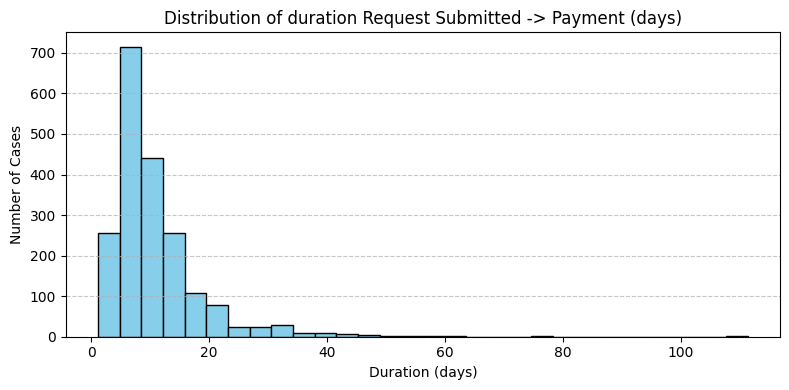

In [ ]:
#duration between "Request For Payment SUBMITTED by EMPLOYEE" and "Payment Handled"

subset = cropped_prepaid_df[cropped_prepaid_df["concept:name"].isin([
    "Request For Payment SUBMITTED by EMPLOYEE",
    "Payment Handled"
])]

subset = subset.sort_values(by=["case:concept:name", "time:timestamp"])

start_events = subset[subset["concept:name"] == "Request For Payment SUBMITTED by EMPLOYEE"]
end_events = subset[subset["concept:name"] == "Payment Handled"]


start_times = start_events.groupby("case:concept:name")["time:timestamp"].first()
end_times = end_events.groupby("case:concept:name")["time:timestamp"].last()


common_cases = start_times.index.intersection(end_times.index)

durations = (end_times[common_cases] - start_times[common_cases]).dt.total_seconds() / (60*60*24)  # in giorni

print(f"Number of cases with Payment Handled: {len(durations)}")
print(f"Mean duration: {durations.mean():.2f} days")
print(f"Median Duration: {durations.median():.2f} days")
print(f"Max duration: {durations.max():.2f} days")
print(f"Min duration: {durations.min():.2f} days")

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of duration Request Submitted -> Payment (days)")
plt.xlabel("Duration (days)")
plt.ylabel("Number of Cases")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Soglia inferiore: -4.37 giorni
Soglia superiore: 23.71 giorni
✅ Casi dopo la rimozione degli outliers: 1856 su 1856
⏱️ Nuova media: 9.29 giorni
⏱️ Nuova mediana: 8.20 giorni


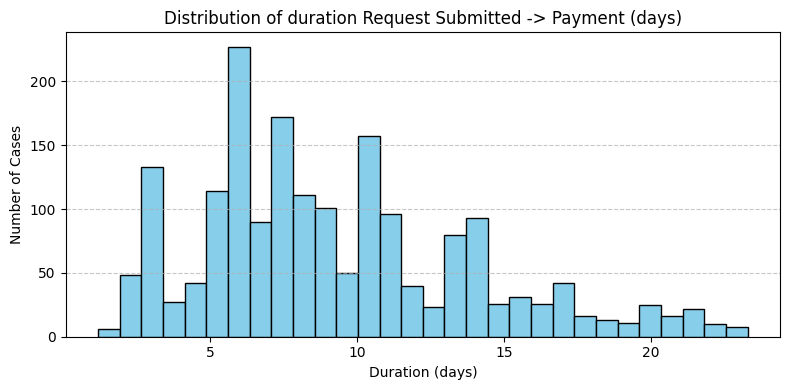

In [ ]:
# IQR
q1 = durations.quantile(0.25)
q3 = durations.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# filter acceptable durations
durations = durations[(durations >= lower_bound) & (durations <= upper_bound)]

print(f"Cases after removing outliers: {len(durations)} su {len(durations)}")
print(f"New mean: {durations.mean():.2f} giorni")
print(f"New Median: {durations.median():.2f} giorni")

plt.figure(figsize=(8,4))
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of duration Request Submitted -> Payment (days)")
plt.xlabel("Duration (days)")
plt.ylabel("Number of Cases")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [ ]:
#tolgo outliers da data frame
# Case ID "buoni", senza outlier
valid_case_ids = durations.index

print(f"Number original cases: {cropped_prepaid_df['case:concept:name'].nunique()}")
# Filtra solo i casi che non sono outlier
cropped_prepaid_df = cropped_prepaid_df[cropped_prepaid_df["case:concept:name"].isin(valid_case_ids)]
# Usa gli stessi case ID validi calcolati prima
prepaid_filtered_df = prepaid_filtered_df[prepaid_filtered_df["case:concept:name"].isin(valid_case_ids)]


print(f"number of cases after removing outliers: {cropped_prepaid_df['case:concept:name'].nunique()}")



📦 Numero di casi originali: 2043
✅ Numero di casi dopo rimozione outliers: 1856


💼 Numero di richieste: 1856
💰 Importo medio richiesto: 1294.77 €
💰 Mediana: 510.89 €
💰 Importo massimo: 507168.86 €
💰 Importo minimo: 4.43 €
📉 Soglia inferiore: -817.52 €
📈 Soglia superiore: 1996.92 €
✅ Casi rimasti dopo filtro importi: 1744 su 1744
💰 Nuovo importo medio: 587.41 €
💰 Nuova mediana: 470.45 €


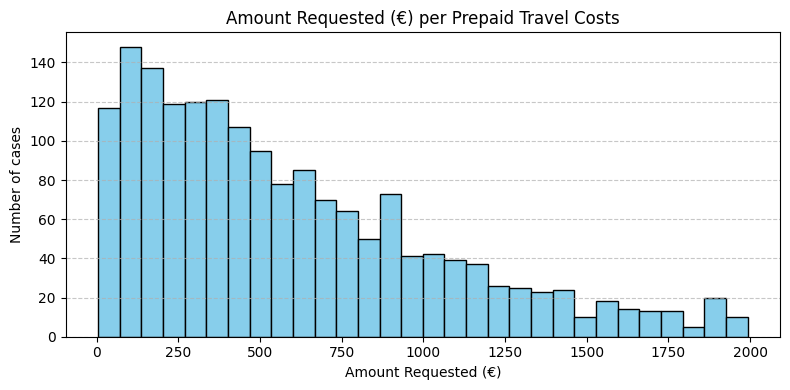

In [ ]:
#get amount requested
requested_amounts = prepaid_filtered_df.drop_duplicates("case:concept:name")[["case:concept:name", "case:RequestedAmount"]].set_index("case:concept:name")["case:RequestedAmount"]

print(f"Numero di richieste: {len(requested_amounts)}")
print(f"Importo medio richiesto: {requested_amounts.mean():.2f} €")
print(f"Mediana: {requested_amounts.median():.2f} €")
print(f"Importo massimo: {requested_amounts.max():.2f} €")
print(f"Importo minimo: {requested_amounts.min():.2f} €")

#IQR
q1 = requested_amounts.quantile(0.25)
q3 = requested_amounts.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Filter acceptable amounts
requested_amounts= requested_amounts[(requested_amounts >= lower_bound) & (requested_amounts <= upper_bound)]

print(f"Casi rimasti dopo filtro importi: {len(requested_amounts)} su {len(requested_amounts)}")

print(f"Nuovo importo medio: {requested_amounts.mean():.2f} €")
print(f"Nuova mediana: {requested_amounts.median():.2f} €")


plt.figure(figsize=(8,4))
plt.hist(requested_amounts, bins=30, color='skyblue', edgecolor='black')
plt.title("Amount Requested (€) per Prepaid Travel Costs")
plt.xlabel("Amount Requested (€)")
plt.ylabel("Number of cases")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



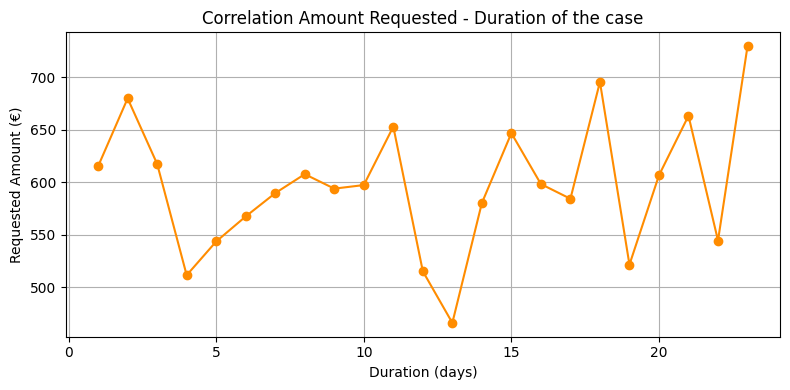

In [ ]:
import pandas as pd

# Union per case ID
df_scatter = pd.concat([durations, requested_amounts], axis=1)
df_scatter.columns = ["duration_days", "requested_amount"]

df_scatter["rounded_duration"] = df_scatter["duration_days"].round().astype(int)
  
#calculate mean requested amount for each rounded duration
grouped = df_scatter.groupby("rounded_duration")["requested_amount"].mean()

plt.figure(figsize=(8,4))
grouped.plot(marker='o', color='darkorange')
plt.title("Correlation Amount Requested - Duration of the case")
plt.xlabel("Duration (days)")
plt.ylabel("Requested Amount (€)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from scipy.stats import pearsonr, spearmanr

df_corr = df_scatter.dropna(subset=["duration_days", "requested_amount"])
print(f"Valori unici in durata: {df_corr['duration_days'].nunique()}")
print(f"Valori unici in amount: {df_corr['requested_amount'].nunique()}")


# Pearson
pearson_corr, pearson_p = pearsonr(df_corr["duration_days"], df_corr["requested_amount"])
print(f"📈 Pearson: coeff = {pearson_corr:.4f}, p-value = {pearson_p:.4f}")

# Spearman
spearman_corr, spearman_p = spearmanr(df_corr["duration_days"], df_corr["requested_amount"])
print(f"📈 Spearman: coeff = {spearman_corr:.4f}, p-value = {spearman_p:.4f}")



Valori unici in durata: 1740
Valori unici in amount: 1730
📈 Pearson: coeff = 0.0071, p-value = 0.7678
📈 Spearman: coeff = -0.0064, p-value = 0.7910
Conclusione: L’analisi statistica non mostra alcuna relazione significativa tra la durata del processo (dal momento della richiesta fino al pagamento) e l’importo richiesto nel log Prepaid. 
I coefficienti di correlazione di Pearson (0.0071) e Spearman (–0.0064) risultano prossimi allo zero e non significativi (p-value > 0.75), indicando che l’ammontare richiesto non incide sui tempi di pagamento. 
Questo suggerisce che il processo di gestione delle richieste anticipate è standardizzato e trattato in modo uniforme, indipendentemente dall’importo.
